In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import os
from subprocess import check_output
import warnings
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Load the dataset (already done in your case)
df = pd.read_excel('python data assg1.xlsx')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract the unique company names from the 'Company' column
company_list = df['Company'].unique()
company_name = company_list.tolist()

# Create a dictionary to hold individual company dataframes
company_data = {company: df[df['Company'] == company] for company in company_list}

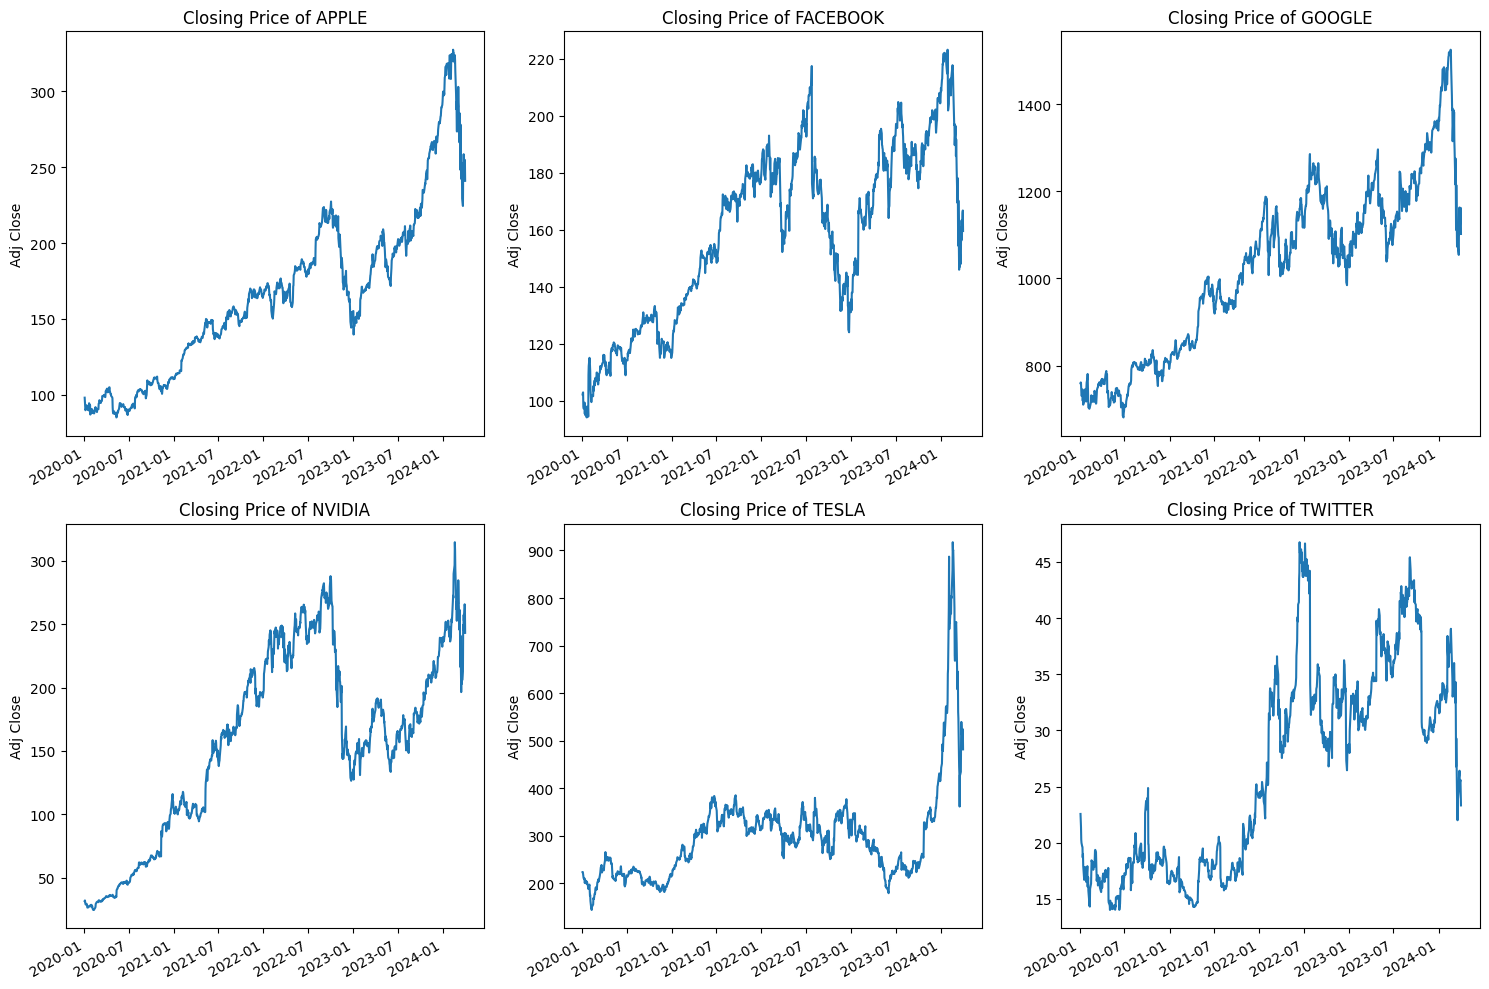

In [ ]:
# Plot the adjusted close price for each company
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 3, i)
    company_df = company_data[company]
    company_df.set_index('Date', inplace=True)  # Set 'Date' as the index for time series plotting
    company_df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company}")

plt.tight_layout()
plt.show()

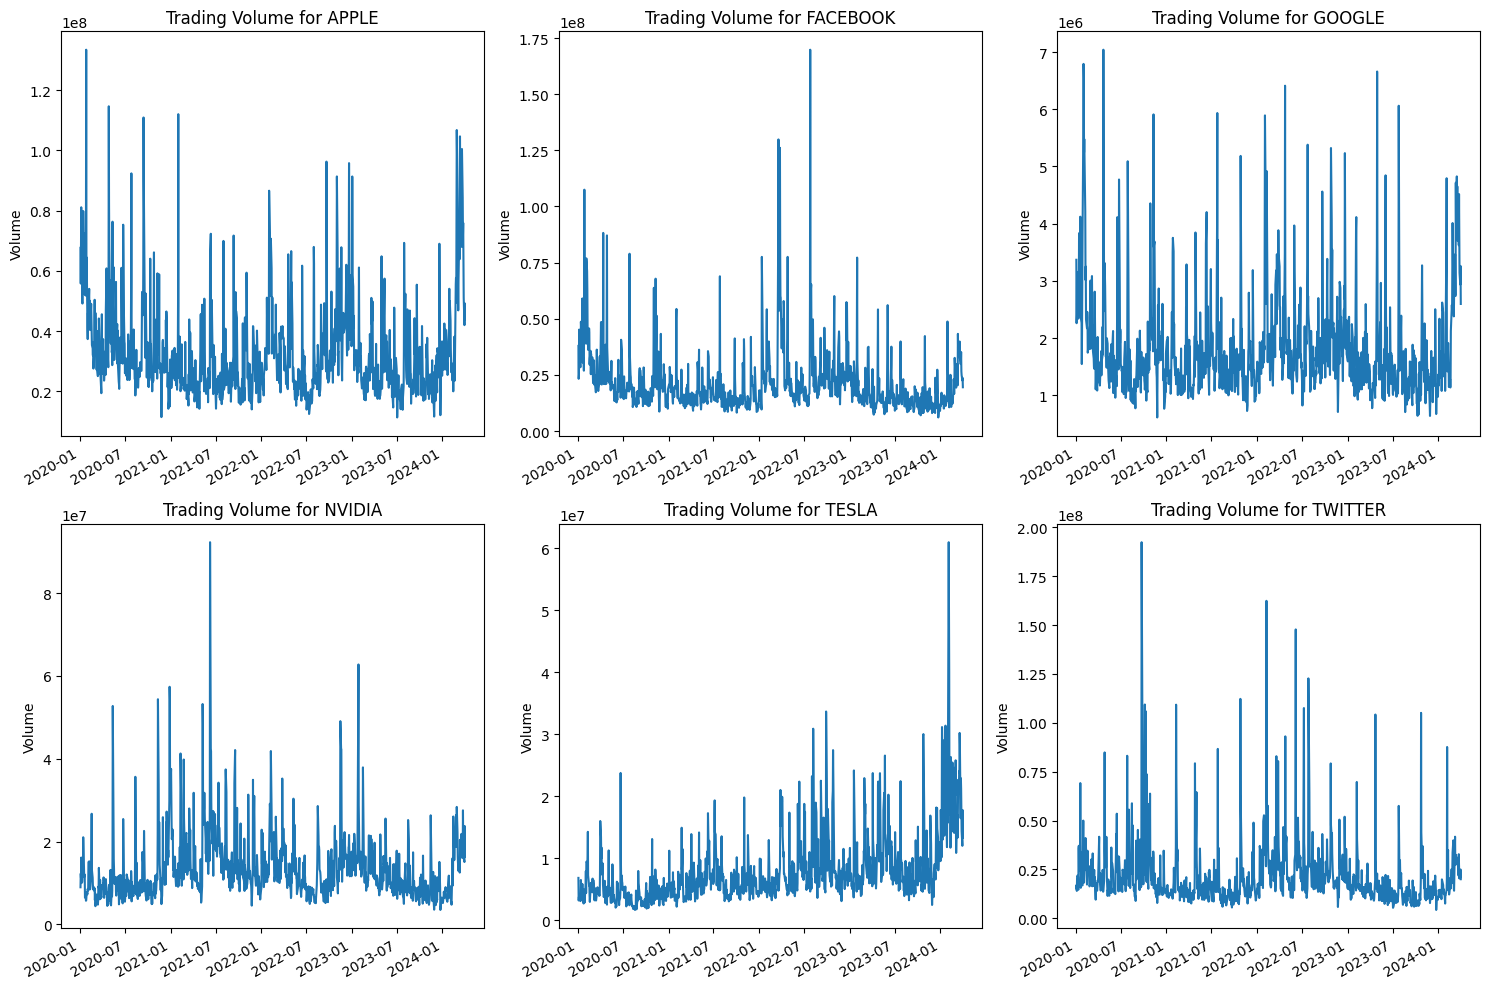

In [ ]:
# Plot the trading volume for each company
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 3, i)
    company_df = company_data[company]
    company_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Trading Volume for {company}")

plt.tight_layout()
plt.show()

<ipython-input-6-5d83145fbfb2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()
<ipython-input-6-5d83145fbfb2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()
<ipython-input-6-5d83145fbfb2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

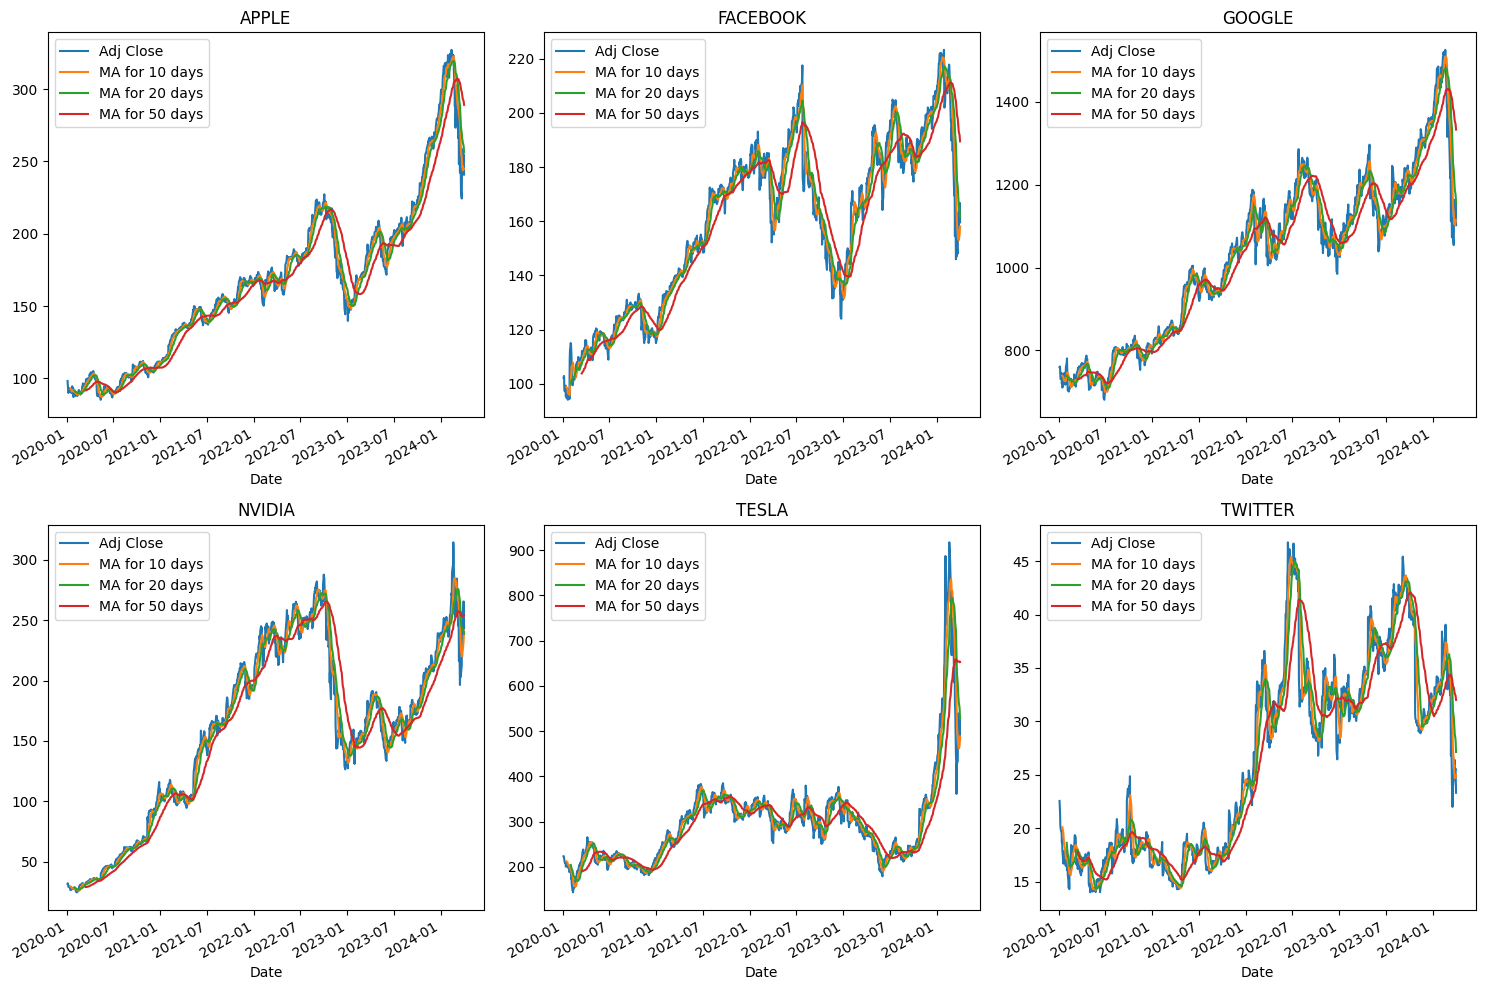

In [ ]:
# Calculate Moving Averages for 10, 20, 50 days
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        company_df = company_data[company]
        column_name = f"MA for {ma} days"
        company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()

# Plot the moving averages for each company
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_name, 1):
    company_df = company_data[company]
    company_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[(i-1)//3, (i-1)%3])
    axes[(i-1)//3, (i-1)%3].set_title(company)

fig.tight_layout()
plt.show()

<ipython-input-7-0ba6ed27c6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['Daily Return'] = company_df['Adj Close'].pct_change()
<ipython-input-7-0ba6ed27c6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['Daily Return'] = company_df['Adj Close'].pct_change()
<ipython-input-7-0ba6ed27c6e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

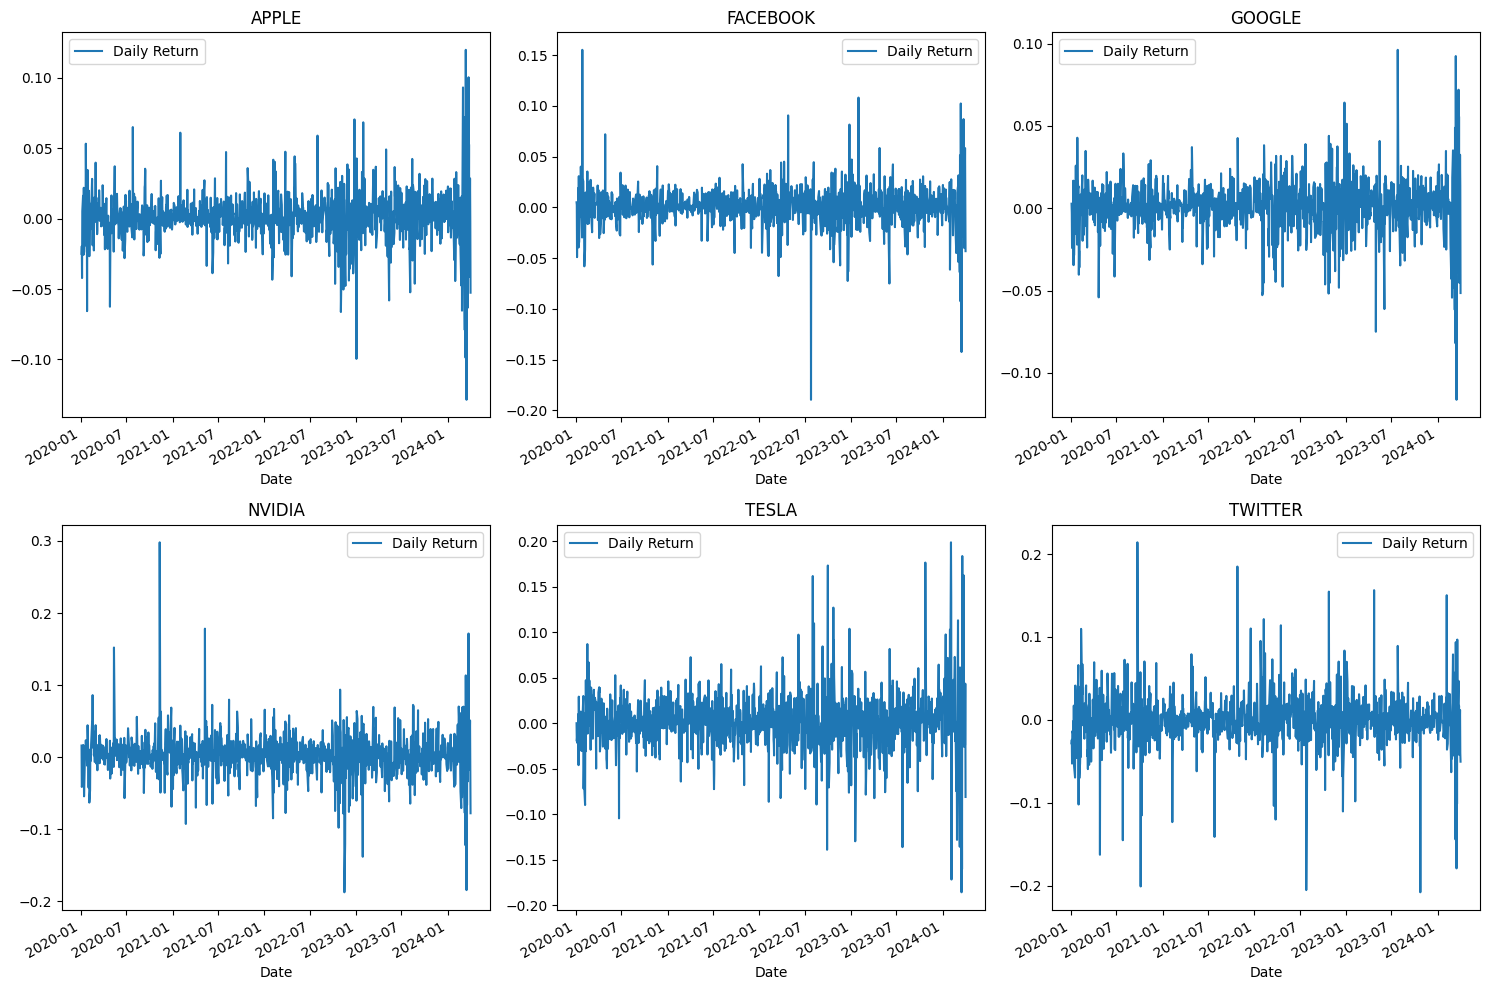

In [ ]:
# Calculate the daily returns for each company
for company in company_list:
    company_df = company_data[company]
    company_df['Daily Return'] = company_df['Adj Close'].pct_change()

# Plot the daily returns for each company
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_name, 1):
    company_df = company_data[company]
    company_df['Daily Return'].plot(ax=axes[(i-1)//3, (i-1)%3], legend=True)
    axes[(i-1)//3, (i-1)%3].set_title(company)

fig.tight_layout()
plt.show()

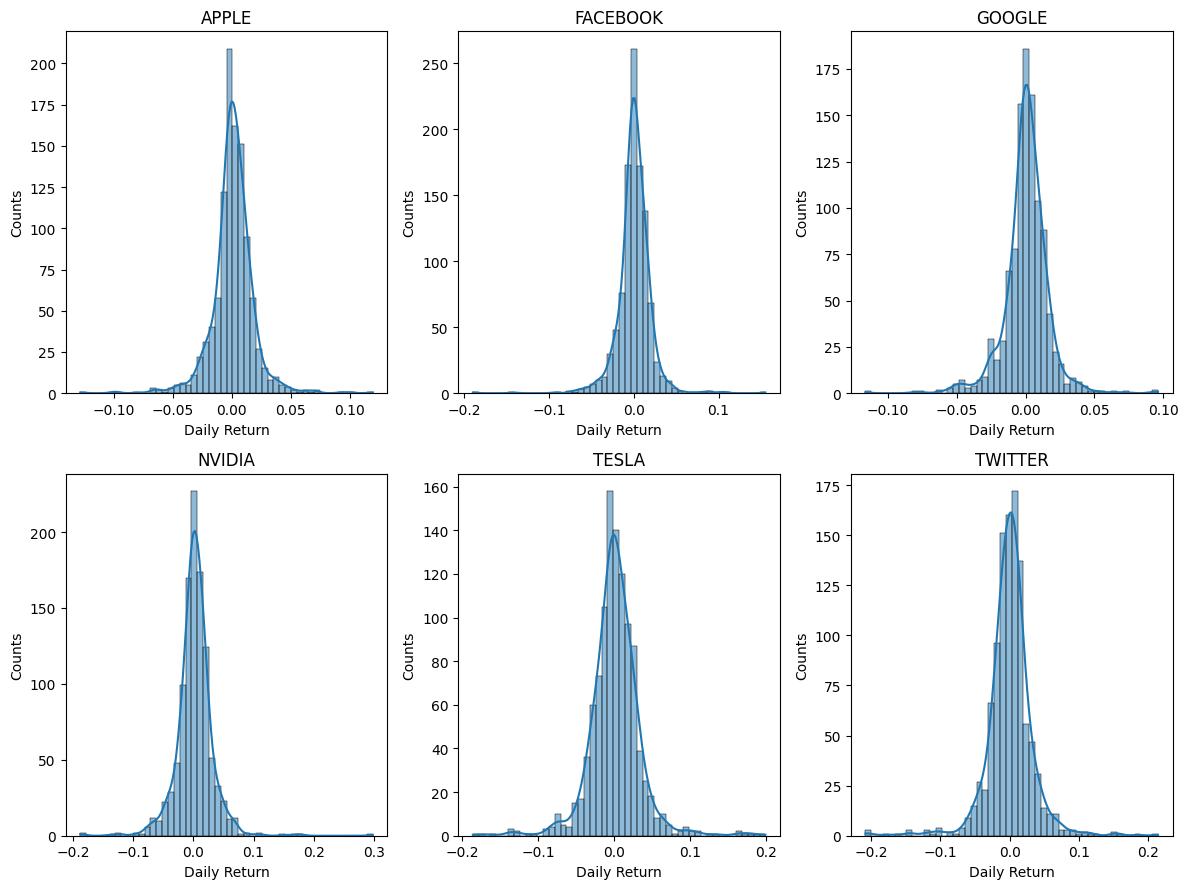

In [ ]:
# Plot histograms of the daily returns for each company
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_name, 1):
    plt.subplot(2, 3, i)
    company_df = company_data[company]
    sns.histplot(company_df['Daily Return'].dropna(), bins=50, kde=True)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(company)

plt.tight_layout()
plt.show()

Company        APPLE  FACEBOOK    GOOGLE    NVIDIA     TESLA   TWITTER
Date                                                                  
2020-01-04       NaN       NaN       NaN       NaN       NaN       NaN
2020-01-05 -0.025059  0.004989  0.002752  0.016064  0.000089 -0.028369
2020-01-06 -0.019570  0.002336 -0.002889 -0.041350 -0.019648 -0.024179
2020-01-07 -0.042205 -0.049043 -0.024140 -0.039645 -0.015477 -0.052828
2020-01-08  0.005287 -0.006025 -0.013617 -0.021466 -0.021563 -0.013820


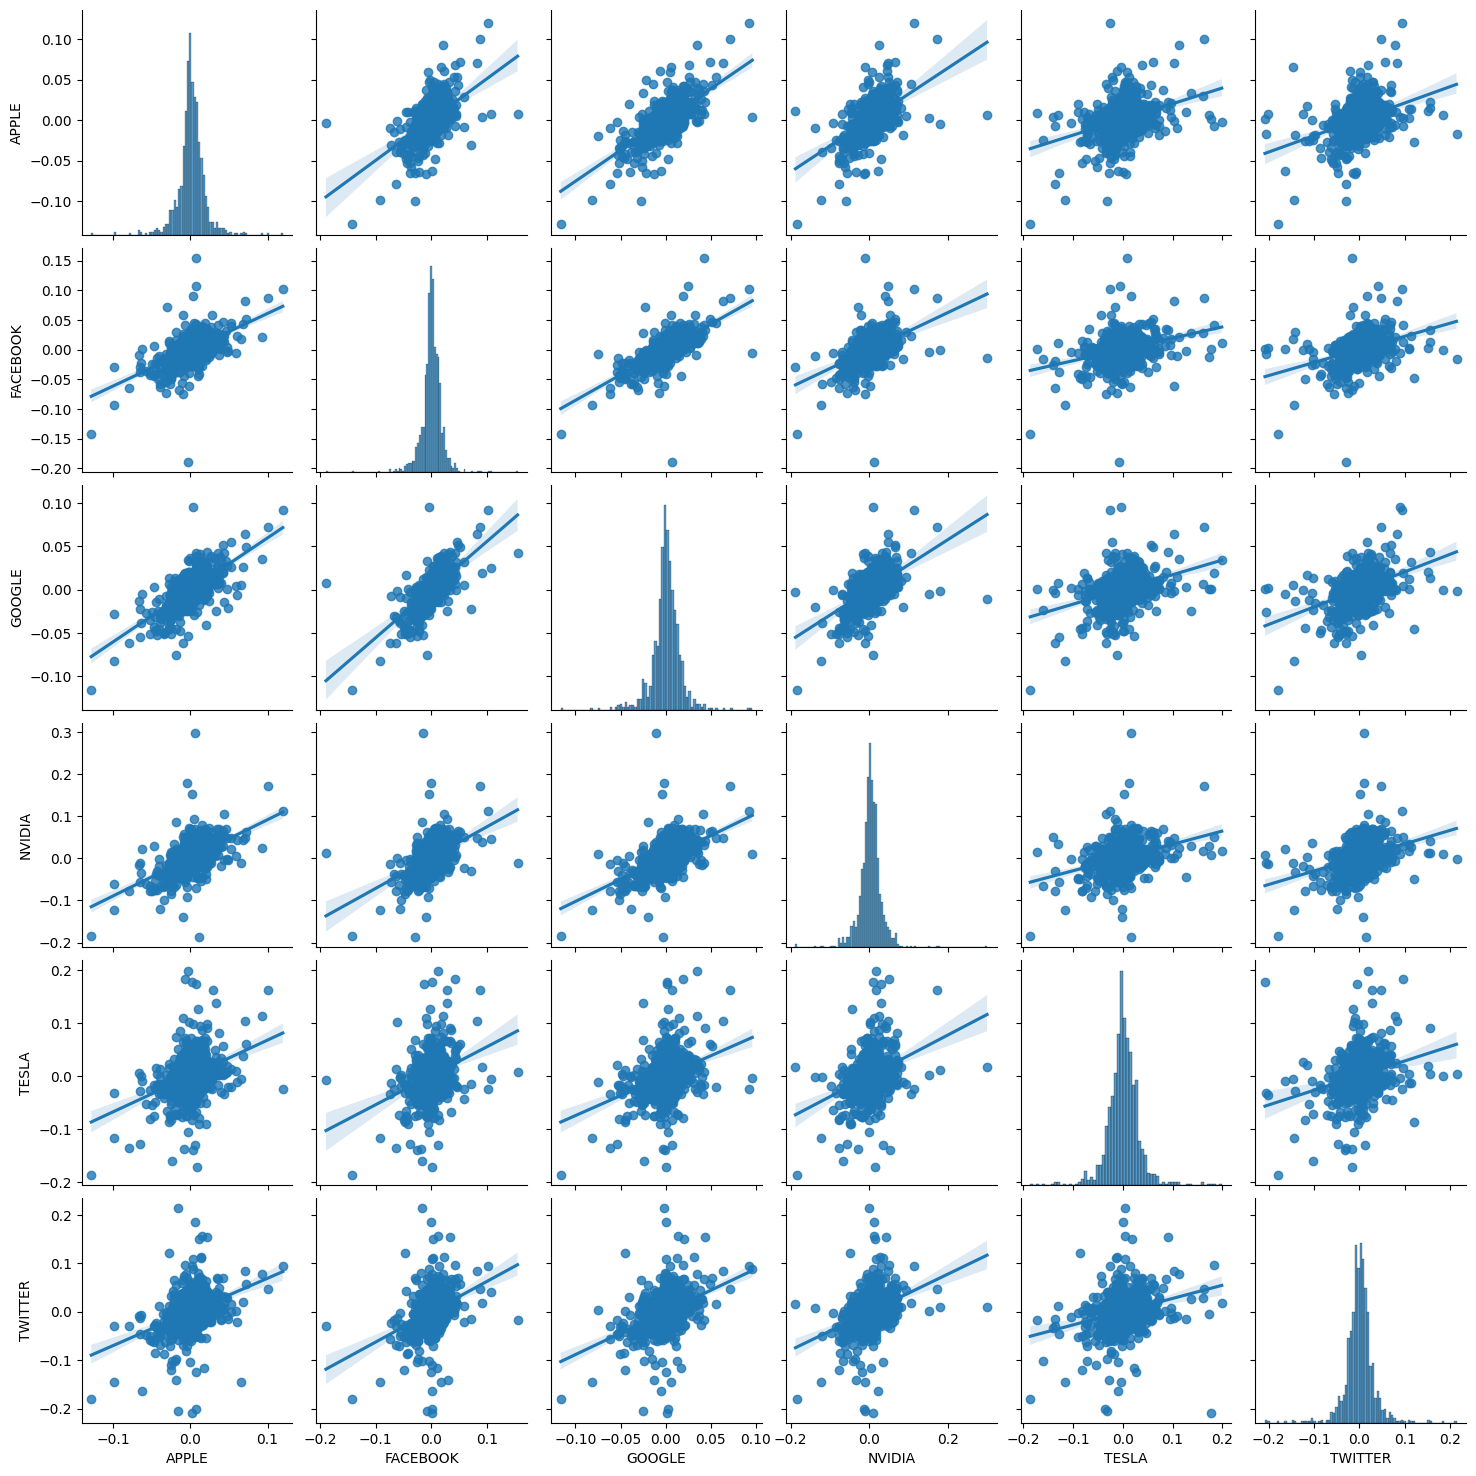

In [ ]:

# Create a DataFrame for closing prices
closing_df = df.pivot(index='Date', columns='Company', values='Adj Close')

# Calculate the percentage returns for each company
tech_rets = closing_df.pct_change()

# Display the first few rows of the percentage returns
print(tech_rets.head())

# Pairplot of the percentage returns
sns.pairplot(tech_rets.dropna(), kind='reg')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'kde'
  cset = contour_func(
/usr/local/lib/python3.10/dist-packages/

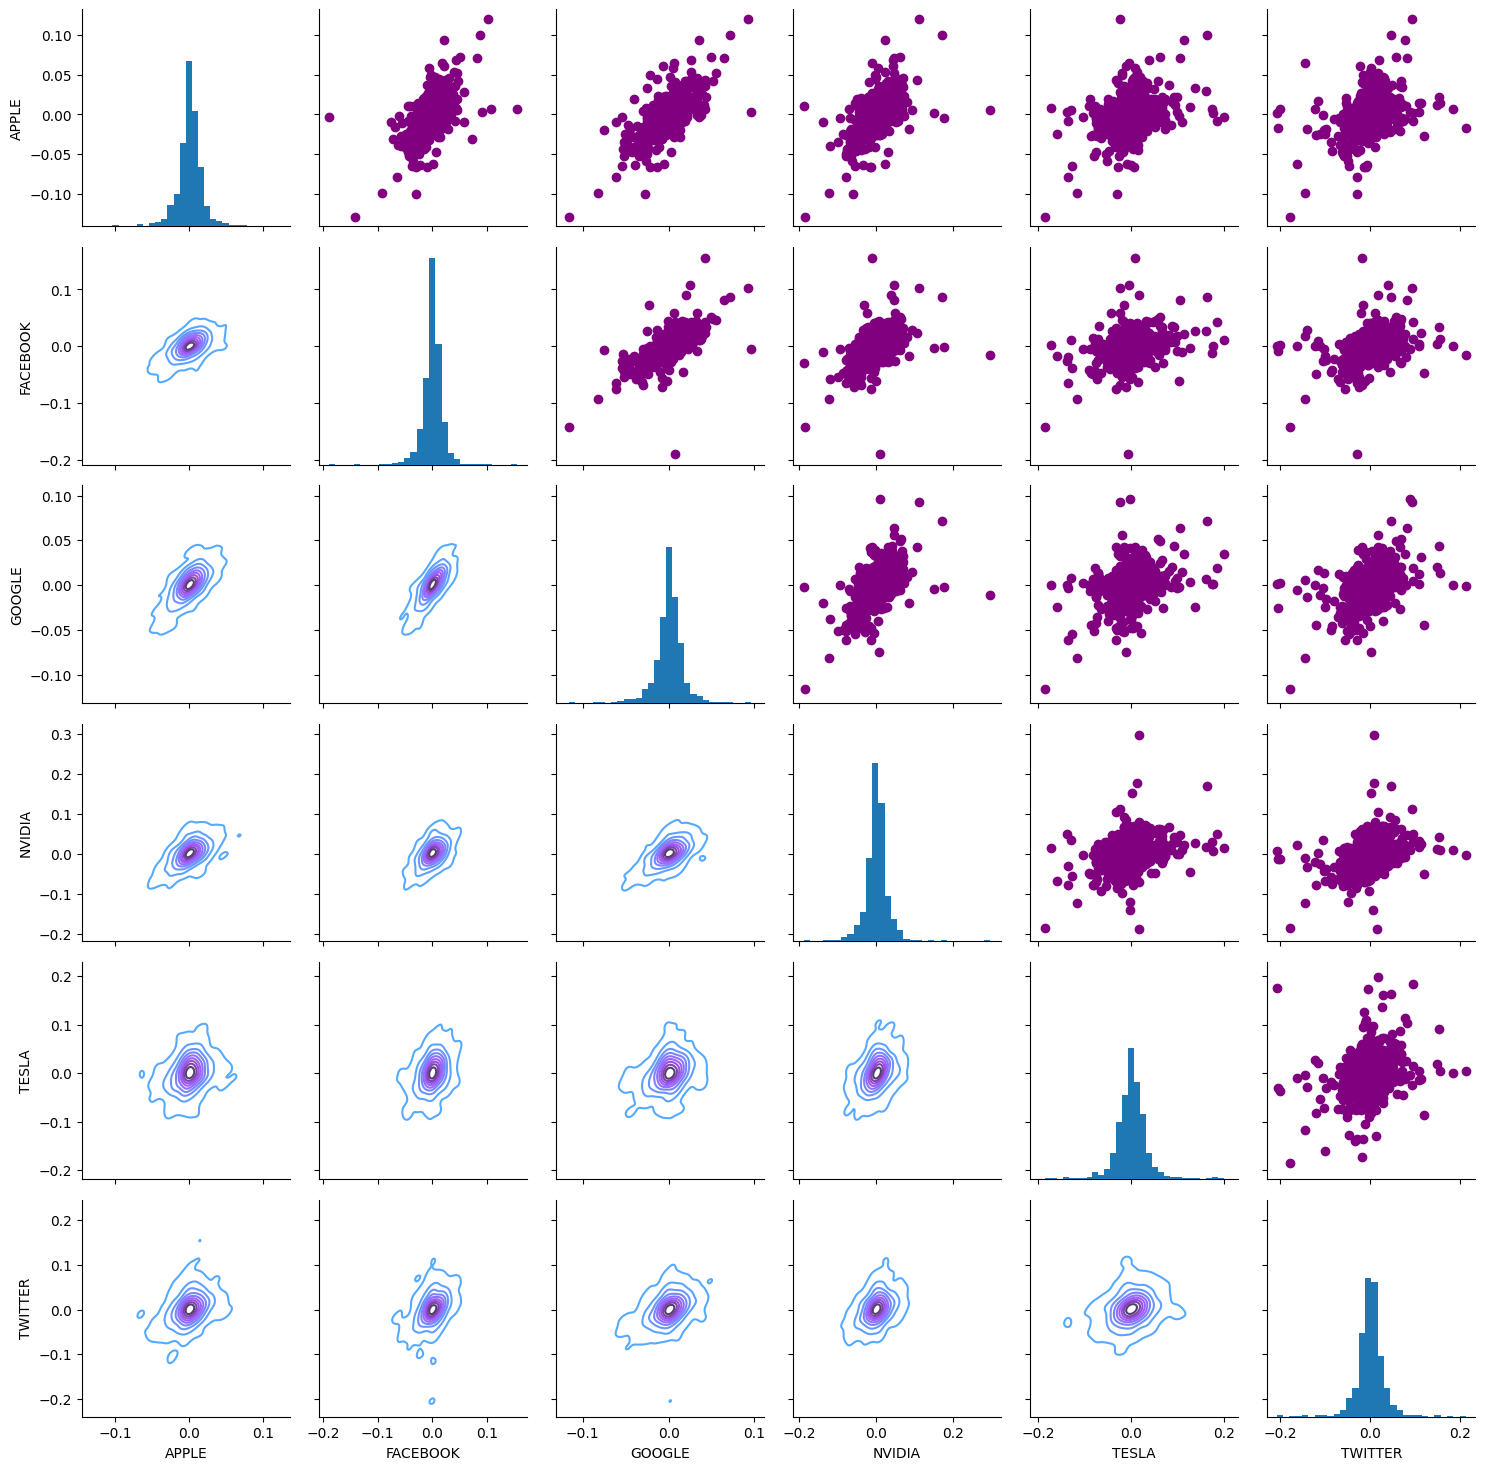

In [ ]:
# Set up our PairGrid figure to plot relationships and distributions
return_fig = sns.PairGrid(tech_rets.dropna())

# Specify the plots for the upper triangle (scatter plot), lower triangle (kde), and diagonal (histograms)
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d', kde=True)
return_fig.map_diag(plt.hist, bins=30)

# Show the PairGrid
plt.show()

Text(0.5, 1.0, 'Correlation of stock returns')

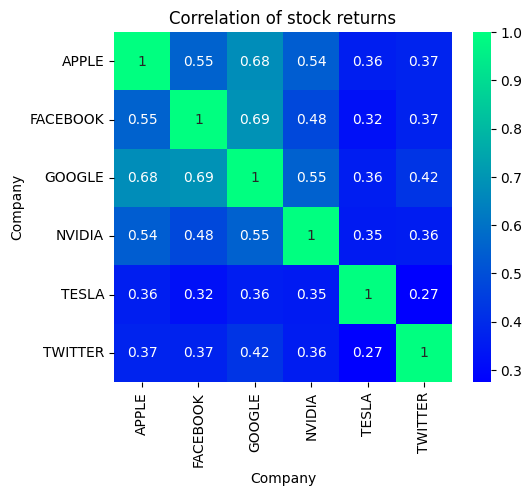

In [ ]:

# Create a figure for heatmaps of correlation matrices
plt.figure(figsize=(12, 10))

# Plot the correlation matrix for stock returns
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock returns')



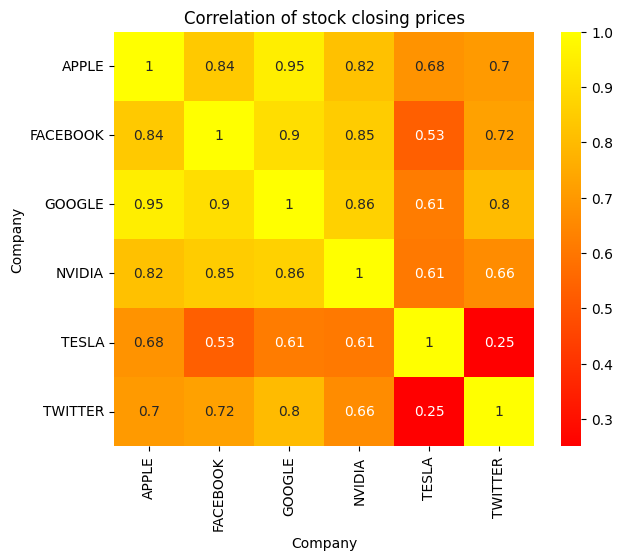

In [ ]:
# Plot the correlation matrix for closing prices
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(closing_df.corr(), annot=True, cmap='autumn')
plt.title('Correlation of stock closing prices')

# Display the heatmaps
plt.tight_layout()
plt.show()

In [ ]:
# Check stationarity using ADF test
result = adfuller(df['Adj Close'].dropna())  # Adjust column name as per dataset
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])



ADF Statistic: -2.712824
p-value: 0.071845


In [ ]:
# Define the company we want to analyze
company = 'APPLE'  # Replace with the actual company you want to work with

# Filter the stock data for the specific company
df = company_data[company]  # Assuming `company_data` from previous steps


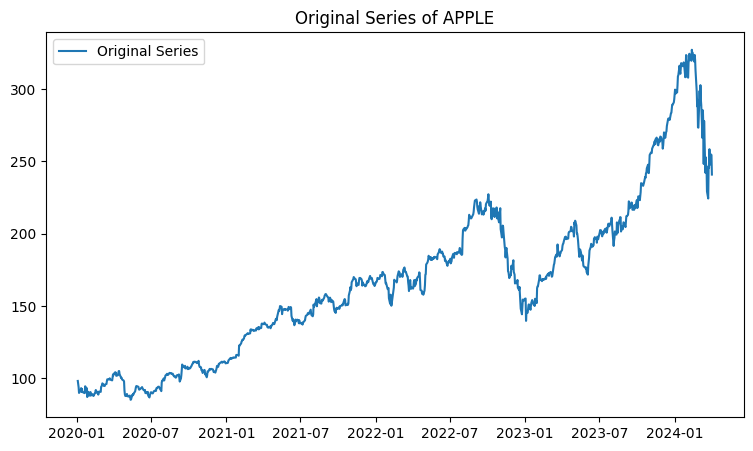

ADF Statistic: -1.363361374058508
p-value: 0.5997097161425662
Series is non-stationary. Differencing is needed.


In [ ]:
# Original Time Series
plt.figure(figsize=(9, 5))
plt.plot(df['Adj Close'], label='Original Series')
plt.title(f'Original Series of {company}')
plt.legend()
plt.show()

# Perform ADF test to check stationarity of the series
result = adfuller(df['Adj Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] > 0.05:
    print('Series is non-stationary. Differencing is needed.')
else:
    print('Series is stationary.')

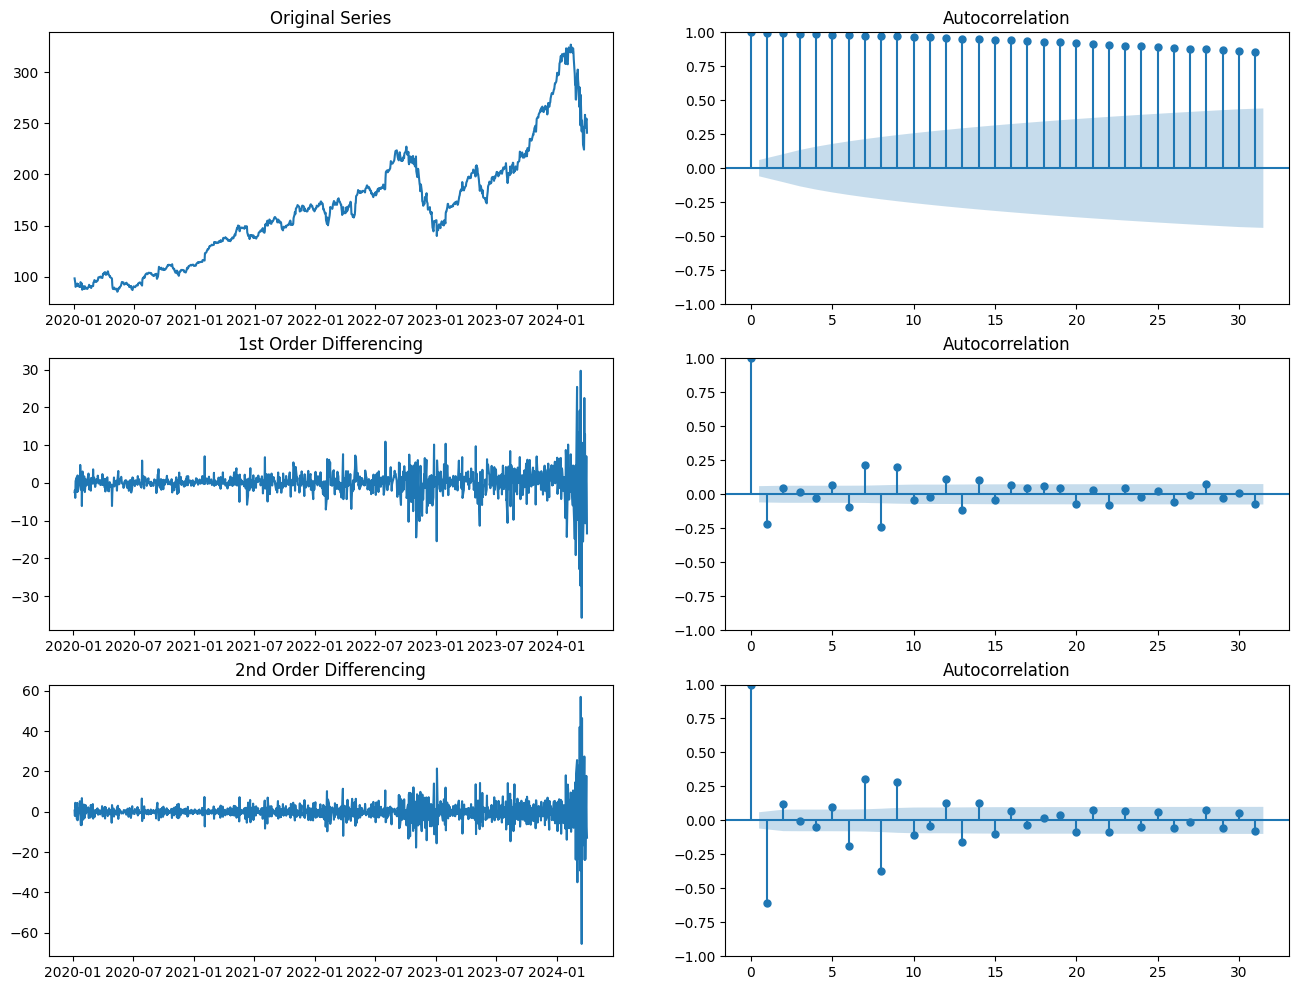

In [ ]:

# Differencing to make the series stationary (1st and 2nd differencing)
df['1st Difference'] = df['Adj Close'].diff()
df['2nd Difference'] = df['1st Difference'].diff()

# Plot the original and differenced series with ACF and PACF
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes[0, 0].plot(df['Adj Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Adj Close'], ax=axes[0, 1])

axes[1, 0].plot(df['1st Difference']); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['1st Difference'].dropna(), ax=axes[1, 1])

axes[2, 0].plot(df['2nd Difference']); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['2nd Difference'].dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
# Fitting ARIMA model (p,d,q) - based on ACF and PACF, set the appropriate parameters
model = ARIMA(df['Adj Close'], order=(1,1,1))  # Example: (p,d,q) = (1,1,1)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1069
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2884.556
Date:                Wed, 02 Oct 2024   AIC                           5775.113
Time:                        06:41:56   BIC                           5790.034
Sample:                             0   HQIC                          5780.766
                               - 1069                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2192      0.046     -4.799      0.000      -0.309      -0.130
ma.L1          0.0020      0.050      0.040      0.968      -0.096       0.100
sigma2        12.9858      0.201     64.472      0.0

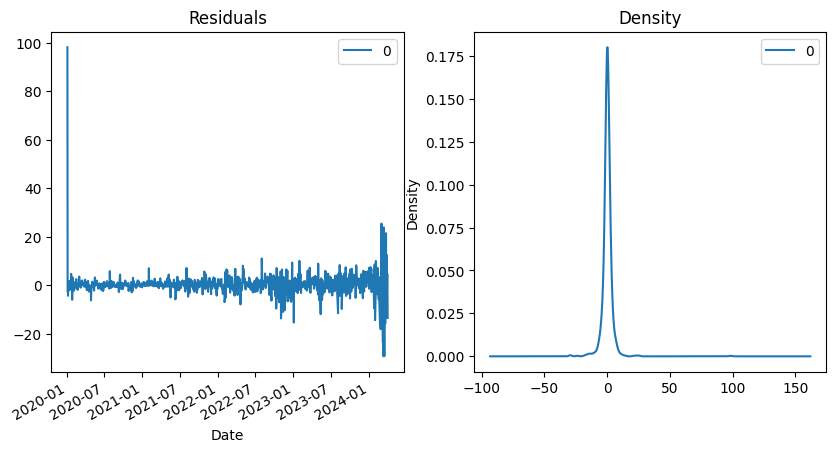

In [ ]:
# Plot residuals to check the goodness of fit
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

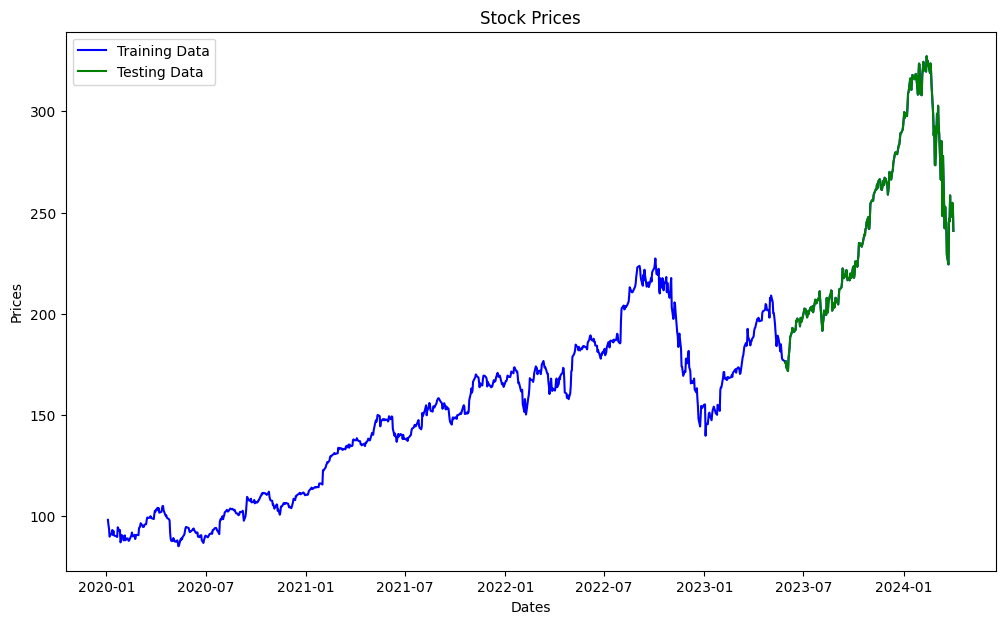

In [ ]:

# Forecasting the future values
train_size = int(len(df) * 0.7)
train, test = df['Adj Close'][:train_size], df['Adj Close'][train_size:]

# Fit ARIMA on training data
model = ARIMA(train, order=(1, 1, 1))  # Adjust order based on ACF and PACF plots
model_fit = model.fit()

# Forecasting the future values using get_forecast (to include confidence intervals)
forecast_result = model_fit.get_forecast(steps=len(test))

train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.legend()

In [ ]:

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 45.274
Symmetric mean absolute percentage error: 1.630


<ipython-input-25-343829df3366>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Adj Close'], 'green', color='blue', label='Training Data')


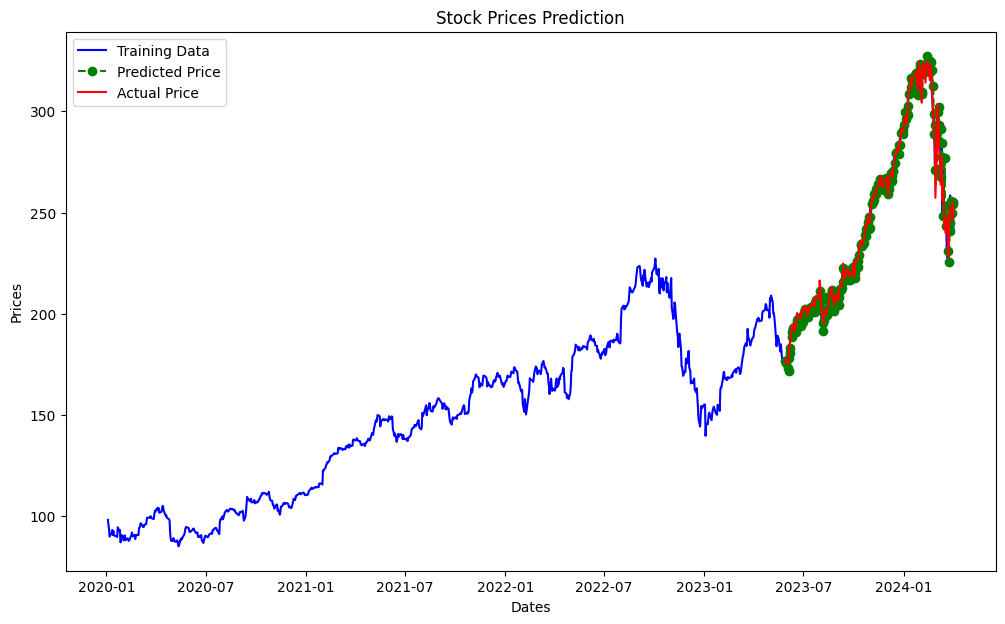

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()